## <b>Chapter 6.군집 분석(Cluster Analysis)</b>

- 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶은 것이다.
- 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법이다.
- 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류하는 것이다.

### 1. 텍스트 유사도(Text Similarity)

- 텍스트 유사도는 대표적으로 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도로 계산할 수 있다.
- 자카드 유사도(Jaccard Similarity): 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용한다.
- 코사인 유사도(Cosine Similarity): 두 벡터 간의 코사인 각도를 이용하여 구할 수 있는 유사도 계산 방식이다.

#### 1) 자카드 유사도

<img src='images/jaccard1.png' width='300px'><img src='images/jaccard2.png' width='400px'>
  
- A, B 두개의 집합이 있다고 할 때, 합집합에서 교집합의 비율을 구함으로써 유사도를 계산 방식이다.

  ###### * 출처 : https://blog.naver.com/sw4r/222223674842

##### ① 데이터 입력

In [1]:
d1 = "The sky is blue"
d2 = "The sun is bright" 
d3 = "The sun in the sky is bright"

##### ② 자카드 유사도 함수 생성

In [2]:
import nltk

nltk.download('punkt')
nltk.download('wordnet')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\poscouser\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\poscouser\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
def jaccard_similarity(d1, d2):
    lemmatizer = WordNetLemmatizer() 
    
    words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
    words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]
    inter = len(set(words1).intersection(set(words2))) 
    union = len(set(words1).union(set(words2))) 

    return inter/union 

##### ③ 자카드 유사도 계산

In [4]:
print(jaccard_similarity(d1, d2))
print(jaccard_similarity(d1, d3))
print(jaccard_similarity(d2, d3))

0.3333333333333333
0.42857142857142855
0.6666666666666666


#### 2) 코사인 유사도

<img src='images/cos.png' width='980px'>

- 두 벡터의 방향이 완전히 동일한 경우에는 1의 값을 가지며, 90°의 각일때 0, 반대방향이면 -1의 값을 가진다.
- 코사인 유사도는 -1 이상 1 이하의 값을 가지며 값이 1에 가까울수록 유사도가 높다고 판단할 수 있다.

##### ① tf-idf vectorizer 객체 생성

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import math
import numpy as np

tfidf_vectorizer = TfidfVectorizer()

##### ② tf-idf 계산

In [6]:
docs = np.array([d1,d2,d3])

tfidf_matrix = tfidf_vectorizer.fit_transform(docs) 

print(tfidf_matrix.toarray())

[[0.66283998 0.         0.         0.39148397 0.50410689 0.
  0.39148397]
 [0.         0.55847784 0.         0.43370786 0.         0.55847784
  0.43370786]
 [0.         0.35934131 0.47249064 0.27906059 0.35934131 0.35934131
  0.55812117]]


##### ③ 코사인 유사도 계산

- d1과 d1,d2,d3간 유사도

In [7]:
similarity = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix)
print(similarity)

[[1.         0.33957935 0.50888967]]


- 각 문서간 유사도

In [8]:
similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(similarity)

[[1.         0.33957935 0.50888967]
 [0.33957935 1.         0.76446063]
 [0.50888967 0.76446063 1.        ]]


- 다른 문서와 d1,d2,d3간 유사도

In [9]:
d5 = 'this is test'
test = tfidf_vectorizer.transform([d5])
similarity = cosine_similarity(test, tfidf_matrix)
print(similarity)

[[0.39148397 0.43370786 0.27906059]]


- 시각화

[[1.         0.33957935 0.50888967]
 [0.33957935 1.         0.76446063]
 [0.50888967 0.76446063 1.        ]]


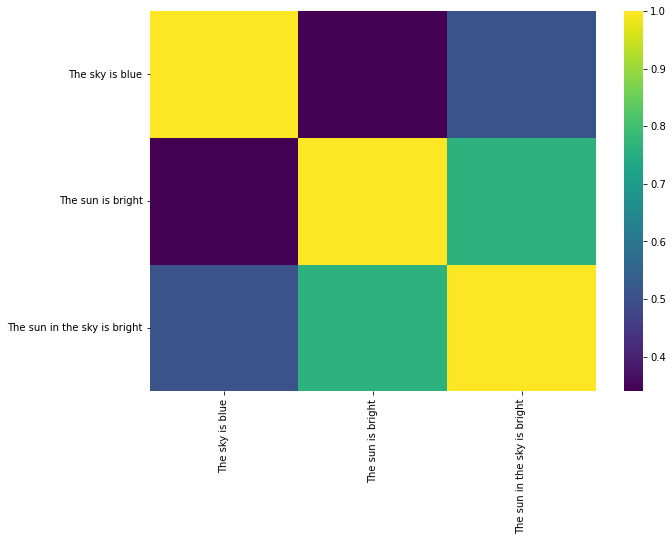

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(similarity)

map = sns.heatmap(similarity, xticklabels=docs, yticklabels=docs, cmap='viridis')
map.figure.set_size_inches(10, 7)
plt.show()

### 2. 군집화를 위한 데이터 전처리

##### ① 네이버 영화 리뷰 데이터 다운 : https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [11]:
import urllib.request
raw = urllib.request.urlopen("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt").readlines()

In [12]:
print(raw[:3])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

##### ② 바이트를 문자열로 변환

In [13]:
raw = [x.decode() for x in raw[1:10000]]
print(raw[:5])

['8112052\t어릴때보고 지금다시봐도 재밌어요ㅋㅋ\t1\n', '8132799\t디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.\t1\n', '4655635\t폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.\t1\n', '9251303\t와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지\t1\n', '10067386\t안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.\t1\n']


##### ③ 리뷰 데이터만 추출

In [14]:
reviews = []
for i in raw:
    reviews.append(i.split("\t")[1])

print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


##### ④ 형태소 분석

In [15]:
from konlpy.tag import Okt
okt = Okt()

In [16]:
reviews = [okt.morphs(x) for x in reviews]

print(reviews[:5][0])

['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ']


### 3. Word2Vec 생성

* `Word2Vec` 모델을 생성한다.
* `gensim`의 `Word2Vec`은 선언과 동시에 학습을 해 단어 벡터들을 생성한다.

##### ① word2vec 모델 생성

In [17]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

In [18]:
word2vec = Word2Vec(reviews, min_count=5)
word2vec

##### ② 영화와 유사한 단어 추출

In [19]:
sim = word2vec.wv.most_similar("영화")
print(sim)

[('작품', 0.9655300378799438), ('듯', 0.9552212953567505), ('느낌', 0.9538707733154297), ('마음', 0.950717568397522), ('이야기', 0.9433567523956299), ('마치', 0.9432289004325867), ('여전', 0.9430585503578186), ('가슴', 0.9418342113494873), ('따뜻', 0.9412399530410767), ('여운', 0.9404435753822327)]


##### ③ t-sne을 이용한 단어 벡터 시각화

In [20]:
tsne = TSNE(n_components=2)
tsne

TSNE()

##### ④ 어휘간 유사도 계산

In [21]:
vocab = word2vec.wv.vocab
similarity = word2vec.wv[vocab] 
print(similarity)

[[-9.9720880e-02  1.1901514e-01  2.8373927e-01 ... -6.0529072e-02
   9.3463592e-02  1.0387553e-01]
 [-2.6461038e-01  2.1551208e-01  8.5381985e-01 ... -1.3644353e-01
   9.8284468e-02  3.2265514e-01]
 [-4.5858192e-01 -7.2388090e-02  1.1000345e+00 ...  6.3179159e-01
  -1.9992183e-01 -1.4500755e-01]
 ...
 [-1.2703545e-02  1.9264786e-02  4.2026099e-02 ... -1.0325530e-03
   1.9043496e-02  2.5066815e-02]
 [-7.3221703e-03  2.6016986e-02  3.8412772e-02 ... -6.0524526e-03
   1.8810881e-02  4.7142074e-02]
 [-1.6372589e-02  1.7883345e-02  4.9527578e-02 ... -5.3797150e-03
   1.3744368e-02  3.7243050e-02]]


##### ⑤ 데이터 프레임으로 변환

In [22]:
import pandas as pd
transform_similarity = tsne.fit_transform(similarity) 
df = pd.DataFrame(transform_similarity, index=vocab, columns=["x", "y"]) 
df[0:10]

,x,y
어릴,25.271572,-12.394211
때,51.129837,-33.046318
보,53.741951,-38.333988
고,52.291702,-38.501553
지금,52.318085,-36.983871
다시,52.726192,-38.006954
봐도,51.759106,-37.557178
재밌,61.994522,-8.783349
어요,62.504547,-9.809092
ㅋㅋ,63.914345,-10.407947


##### ⑥ 시각화

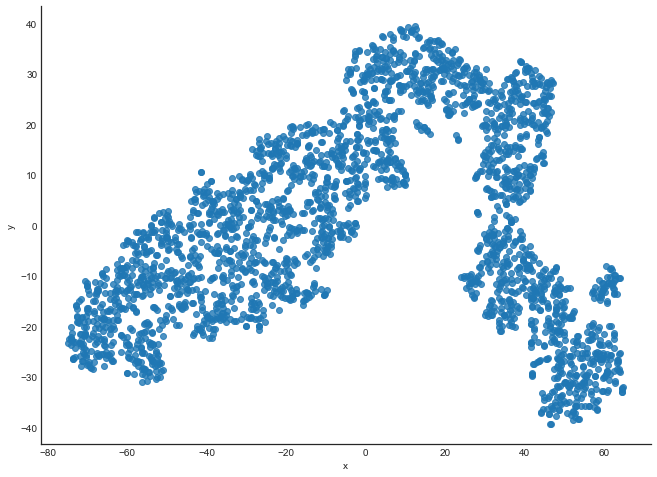

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-white")

map = sns.lmplot(x='x', y='y', data=df, fit_reg=False)
map.figure.set_size_inches(10, 7)
plt.show()

### 4. Scikit-learn, Scipy를 이용한 계층적 군집화

* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼




#### 1) Scikit-learn을 이용한 계층적 군집화

- 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용하여 계층적 군집화 실습을 한다.    
- 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행한다.
- 계속 합쳐 나가더라도 언젠가는 종료해야 하는데, 병합 군집의 종료 조건에는 3가지를 지정 가능하다.
  1.   ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합친다.(기본값)
  2.   average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합친다.
  3.   complete - 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합친다.
* `scikit-learn` 사용 예제에서는 3가지 종료 조건 간의 차이를 비교해 본다.

##### ① ward

In [24]:
from sklearn.cluster import AgglomerativeClustering

- ward 객체 생성

In [25]:
ward = AgglomerativeClustering(n_clusters=6, linkage='ward') 

- 어떤 클러스터에 속하는지 예측 연산

In [26]:
predict = ward.fit_predict(df) 
print(predict)

[0 0 0 ... 1 1 1]


- 데이터 프레임으로 변환

In [27]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,25.271572,-12.394211,0
때,51.129837,-33.046318,0
보,53.741951,-38.333988,0
고,52.291702,-38.501553,0
지금,52.318085,-36.983871,0
다시,52.726192,-38.006954,0
봐도,51.759106,-37.557178,0
재밌,61.994522,-8.783349,0
어요,62.504547,-9.809092,0
ㅋㅋ,63.914345,-10.407947,0


- 시각화

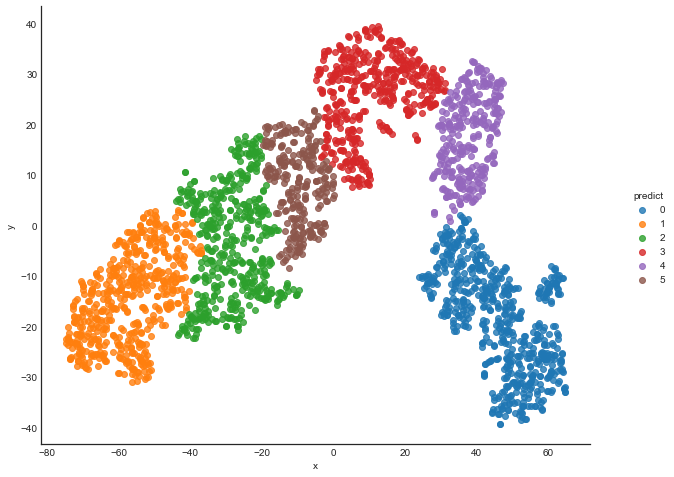

In [28]:
map = sns.lmplot(x='x', y='y', data=results, fit_reg=False, hue="predict") 
map.figure.set_size_inches(10, 7)
plt.show()

##### ② average

- average 객체 생성

In [29]:
avg = AgglomerativeClustering(n_clusters=6, linkage="average")

- 어떤 클러스터에 속하는지 예측 연산

In [30]:
predict = avg.fit_predict(df)
print(predict)

[0 0 0 ... 5 5 5]


- 데이터 프레임으로 변환

In [31]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,25.271572,-12.394211,0
때,51.129837,-33.046318,0
보,53.741951,-38.333988,0
고,52.291702,-38.501553,0
지금,52.318085,-36.983871,0
다시,52.726192,-38.006954,0
봐도,51.759106,-37.557178,0
재밌,61.994522,-8.783349,0
어요,62.504547,-9.809092,0
ㅋㅋ,63.914345,-10.407947,0


- 시각화

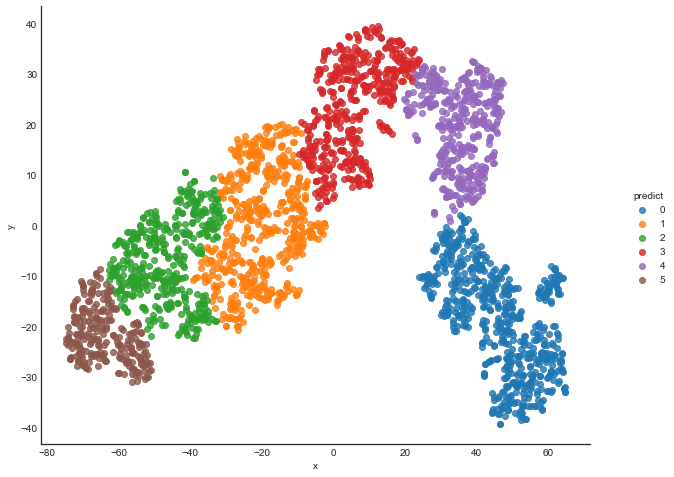

In [32]:
map = sns.lmplot(x='x', y='y', data=results, fit_reg=False, hue="predict")
map.figure.set_size_inches(10, 7)
plt.show()

##### ③ complete

- complete 객체 생성

In [33]:
compl = AgglomerativeClustering(n_clusters=6, linkage="complete")

- 어떤 클러스터에 속하는지 예측 연산

In [34]:
predict = compl.fit_predict(df)
print(predict)

[2 4 4 ... 0 0 0]


- 데이터 프레임으로 변환

In [35]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,25.271572,-12.394211,2
때,51.129837,-33.046318,4
보,53.741951,-38.333988,4
고,52.291702,-38.501553,4
지금,52.318085,-36.983871,4
다시,52.726192,-38.006954,4
봐도,51.759106,-37.557178,4
재밌,61.994522,-8.783349,4
어요,62.504547,-9.809092,4
ㅋㅋ,63.914345,-10.407947,4


- 시각화

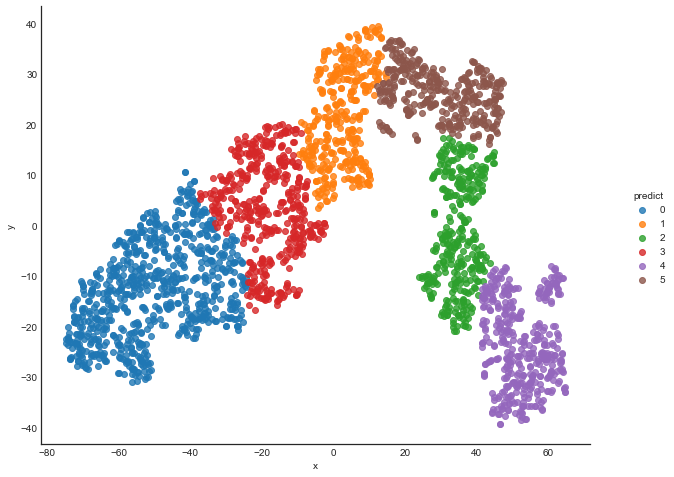

In [36]:
map = sns.lmplot(x='x', y='y', data=results, fit_reg=False, hue="predict")
map.figure.set_size_inches(10, 7)
plt.show()

#### 2) Scipy를 이용한 계층적 군집화

* scipy를 이용한 거리 사용과 word2vec 사용을 비교해 본다.

##### ① `pdist`를 이용한 각 단어간 유클리디안 거리 계산

In [37]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

In [38]:
distmatrix = pdist(df, metric="euclidean")
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,...,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635
0,0.000000,33.153573,38.567273,37.625533,36.608268,37.600117,36.589129,36.954207,37.376159,38.745440,...,67.887316,92.840077,51.390873,88.930735,83.105716,92.517989,86.195711,93.104388,95.034105,97.670316
1,33.153573,0.000000,5.897677,5.577590,4.112938,5.211167,4.554541,26.584451,25.871852,25.998837,...,99.333440,119.068889,81.985145,116.801239,111.793993,117.239548,113.815907,119.044482,122.473841,123.692527
2,38.567273,5.897677,0.000000,1.459897,1.962195,1.067107,2.129579,30.681349,29.840456,29.721060,...,103.902856,122.327159,86.420687,120.426923,115.625608,120.193437,117.398847,122.241772,125.980557,126.885884
3,37.625533,5.577590,1.459897,0.000000,1.517910,0.658338,1.084205,31.262059,30.455862,30.402903,...,102.671108,120.918481,85.164570,119.051474,114.273852,118.764532,116.019353,120.828540,124.592790,125.472008
4,36.608268,4.112938,1.962195,1.517910,0.000000,1.101476,0.800711,29.814475,29.021245,28.995742,...,102.038699,120.726930,84.575876,118.744734,113.899473,118.664227,115.725507,120.655577,124.324938,125.301239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,92.517989,117.239548,120.193437,118.764532,118.664227,119.153813,118.152998,129.394051,129.751765,131.066359,...,43.097999,7.534024,47.443861,16.306651,21.776276,0.000000,15.348891,6.101255,14.687676,8.769068
2632,86.195711,113.815907,117.398847,116.019353,115.725507,116.337405,115.297771,123.039756,123.515585,124.908589,...,28.894584,9.476579,37.031725,3.193563,6.504500,15.348891,0.000000,10.707193,8.843003,13.728538
2633,93.104388,119.044482,122.241772,120.828540,120.655577,121.191972,120.174649,130.044236,130.452341,131.801897,...,39.489775,1.491982,45.959362,10.852746,17.179436,6.101255,10.707193,0.000000,8.591409,4.650577
2634,95.034105,122.473841,125.980557,124.592790,124.324938,124.921001,123.885558,131.878391,132.354052,133.746741,...,36.010103,7.219214,45.655305,6.406108,13.452558,14.687676,8.843003,8.591409,0.000000,8.127953


##### ② 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

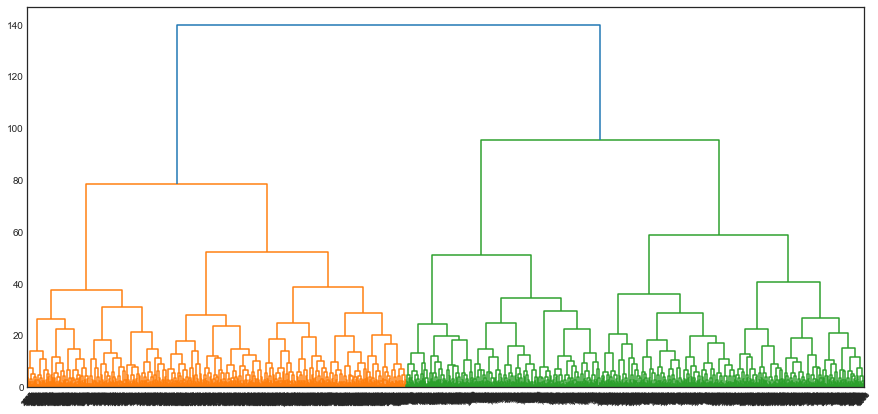

In [39]:
row_clusters = linkage(distmatrix, method="complete")

plt.figure(figsize=(15,7))
dendrogram(row_clusters, leaf_rotation=50, leaf_font_size=7) 
plt.show()

##### ③ `word2vec`을 이용한 군집 분석 및 덴드로그램 시각화

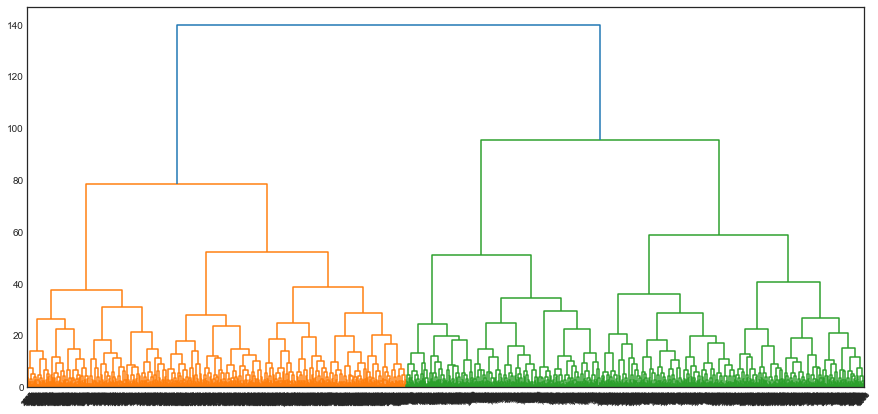

In [40]:
mergings = linkage(df, method="complete")

plt.figure(figsize=(15,7))
dendrogram(mergings, leaf_rotation=50, leaf_font_size=7)
plt.show()

### 5. Scikit-learn을 이용한 비계층적 군집화

* 비계층적 군집화는 나눌 클러스터 개수를 지정해 각 개체가 어느 클러스터에 속하는 지를 결정
* 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, 클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요

* 대표적인 비계층적 군집화 알고리즘인 kmeans를 사용해 실습

#### 1) 클러스터 3개

##### ① KMeans 객체 생성

In [41]:
from sklearn.cluster import KMeans

In [42]:
kmeans = KMeans(n_clusters=3, n_init=10)

##### ② 어떤 클러스트에 속하는지 클러스터 인덱스 번호 출력

In [43]:
predict = kmeans.fit_predict(df)
print(predict )

[1 1 1 ... 0 0 0]


##### ③ 데이터 프레임으로 변환

In [44]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,25.271572,-12.394211,1
때,51.129837,-33.046318,1
보,53.741951,-38.333988,1
고,52.291702,-38.501553,1
지금,52.318085,-36.983871,1
다시,52.726192,-38.006954,1
봐도,51.759106,-37.557178,1
재밌,61.994522,-8.783349,1
어요,62.504547,-9.809092,1
ㅋㅋ,63.914345,-10.407947,1


##### ④ 시각화

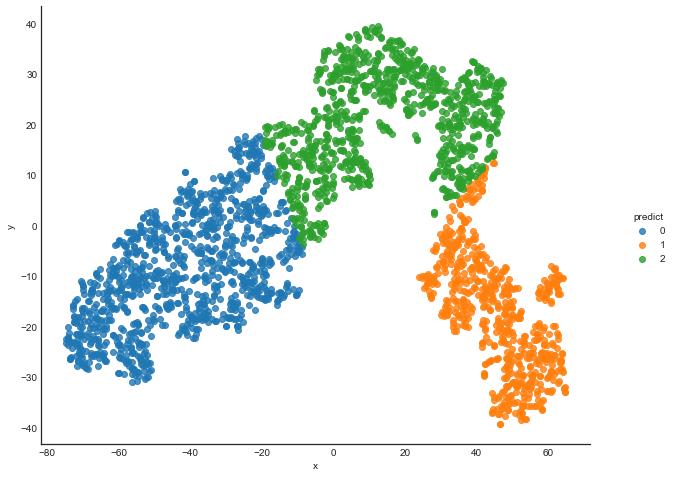

In [45]:
map = sns.lmplot(x='x', y='y', data = results, fit_reg = False, hue = "predict")
map.figure.set_size_inches(10, 7)
plt.show()

#### 2) 클러스터 6개

##### ① KMeans 객체 생성

In [46]:
kmeans = KMeans(n_clusters=6, n_init=10)

##### ② 어떤 클러스트에 속하는지 클러스터 인덱스 번호 출력

In [47]:
predict = kmeans.fit_predict(df)
print(predict )

[1 1 1 ... 5 5 5]


##### ③ 데이터 프레임으로 변환

In [48]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,25.271572,-12.394211,1
때,51.129837,-33.046318,1
보,53.741951,-38.333988,1
고,52.291702,-38.501553,1
지금,52.318085,-36.983871,1
다시,52.726192,-38.006954,1
봐도,51.759106,-37.557178,1
재밌,61.994522,-8.783349,1
어요,62.504547,-9.809092,1
ㅋㅋ,63.914345,-10.407947,1


##### ④ 시각화

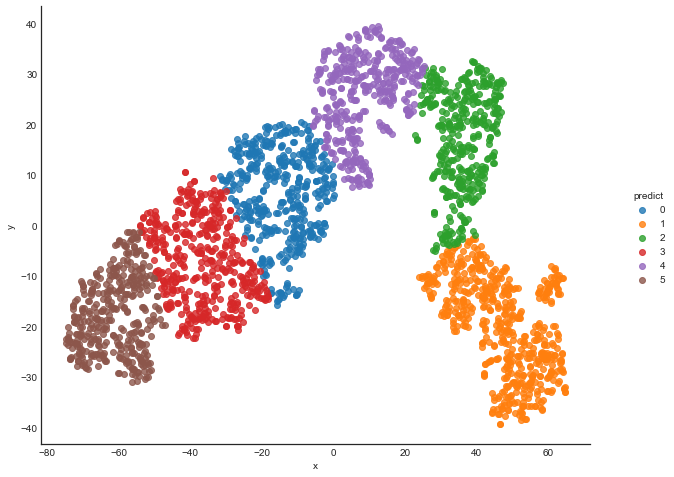

In [49]:
map = sns.lmplot(x='x', y='y', data = results, fit_reg = False, hue = "predict")
map.figure.set_size_inches(10, 7)
plt.show()